# K-Nearest Neighbors (KNN) — From Scratch (Iris Dataset)

This notebook implements **K-Nearest Neighbors (KNN)** **from scratch**, using your custom package  
`rice2025` — specifically:

- `KNN` from `rice2025.supervised_learning.knn`
- `StandardScaler` from `rice2025.utils.scaling`
- `train_test_split` from `rice2025.utils.train_test_split`

We will walk through intuition, math, EDA, model training, and evaluation.


## Intuition

K-Nearest Neighbors is an **instance-based**, **non-parametric** algorithm.

For a new point:

1. Compute distances to all training points  
2. Select the **k nearest neighbors**  
3. For classification → take majority vote  
4. For regression → take average

It makes **no assumptions** about model form (non-parametric) and can learn **non-linear boundaries**.


## Math Behind KNN

### Distance Metric
We use Euclidean distance:
\[
d(x_i, x_j) = \sqrt{\sum_{p=1}^m (x_{i,p} - x_{j,p})^2}
\]

### Classification Rule
\[
\hat{y} = \arg\max_{c} \sum_{i \in \mathcal{N}_k(x)} \mathbf{1}(y_i = c)
\]

### Trade-offs
**Pros:** Simple, interpretable, no training needed  
**Cons:** Slow for big data, sensitive to scaling, sensitive to irrelevant features  


## Why KNN is Non-Parametric
- No fixed formula or parameters (like slope/intercept in linear models)
- Decision boundary adapts to the shape of the data
- Model complexity grows with dataset size


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from rice2025.supervised_learning.knn import KNNClassifier
from rice2025.utils.scaling import StandardScaler
from rice2025.utils.train_test_split import train_test_split

# Load iris dataset from local CSV
df = pd.read_csv("iris.csv")
df.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## Load Iris Dataset
We will use the Iris dataset using csv.


In [24]:
df = pd.read_csv("iris.csv")
df.head()

# Features and labels
X = df[["sepal.length", "sepal.width", "petal.length", "petal.width"]].values

# Convert flower species -> integer labels
y = df["variety"].astype("category").cat.codes.values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🔍 Exploratory Data Analysis (EDA)

Before modeling, we visualize:
- Pairwise feature relationships
- Correlation between numeric predictors

Species (“variety”) is categorical, so we exclude it from correlation matrices.


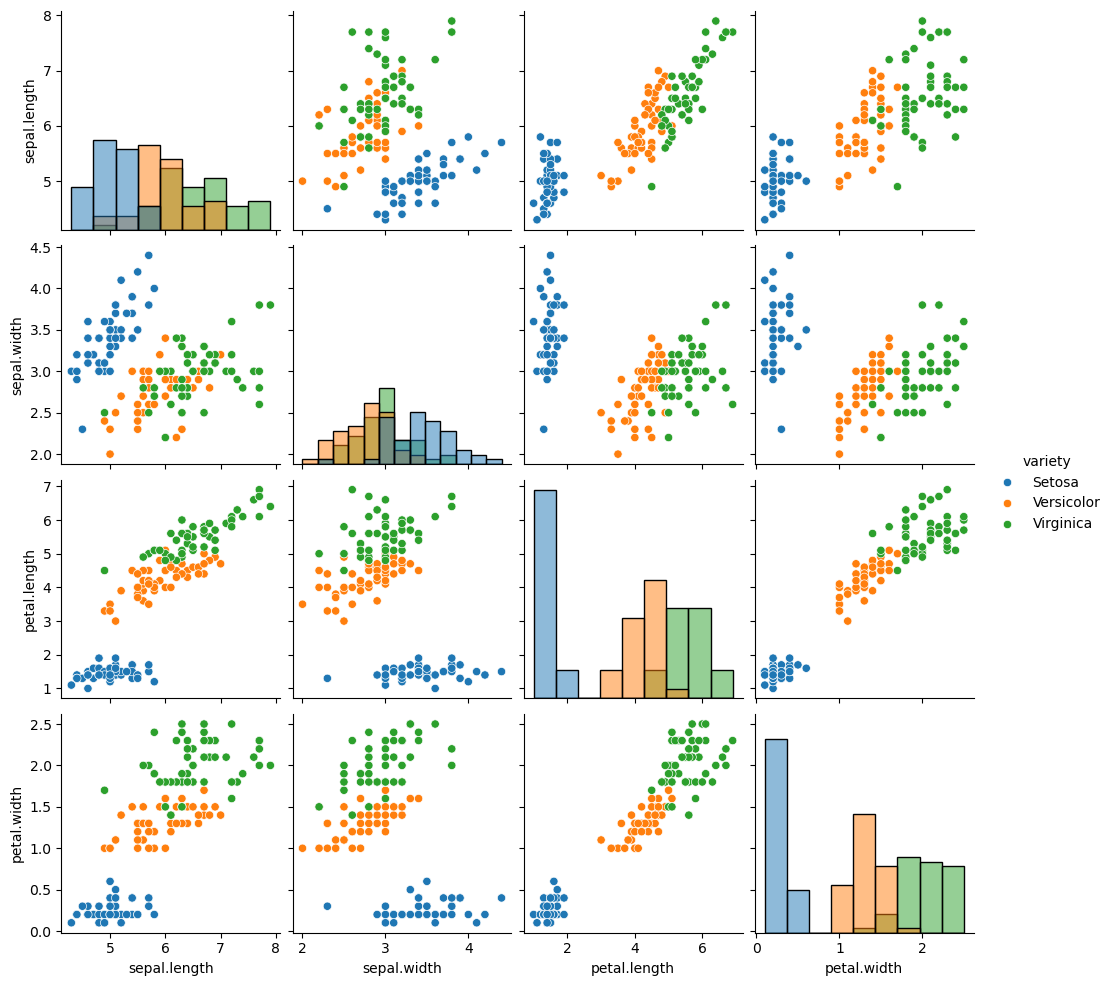

In [25]:
sns.pairplot(df, hue="variety", diag_kind="hist")
plt.show()


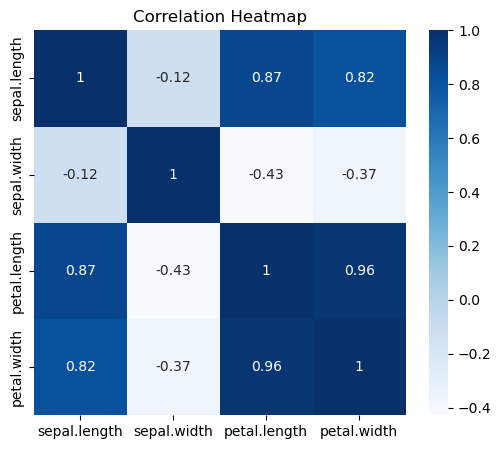

In [26]:
plt.figure(figsize=(6,5))
sns.heatmap(df.drop(columns=["variety"]).corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


## Standardization

KNN is distance-based → scaling is *essential*.


In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##  Train KNN Classifier

We use `k = 5`, a common choice for Iris.


In [29]:
knn = KNNClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


## Evaluate Model
We compute accuracy on the test set.


In [31]:
y_pred = knn.predict(X_test_scaled)
accuracy = np.mean(y_pred == y_test)
print("KNN Accuracy:", accuracy)


KNN Accuracy: 0.9


##  Confusion Matrix

This helps visualize classification errors across classes.


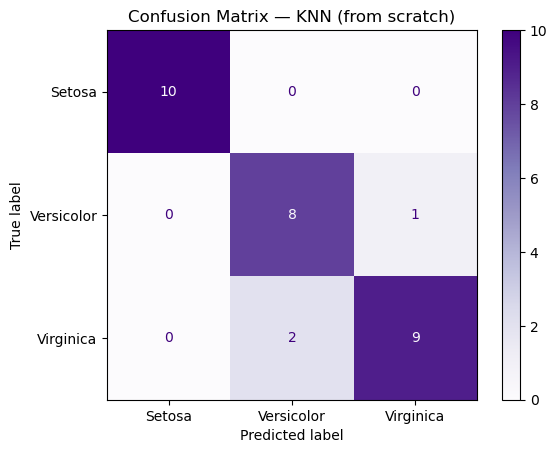

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=df["variety"].unique())
disp.plot(cmap="Purples")
plt.title("Confusion Matrix — KNN (from scratch)")
plt.show()


## 2D Decision Boundary Visualization (PCA Projection)

We project to 2D using PCA so we can plot decision boundaries.


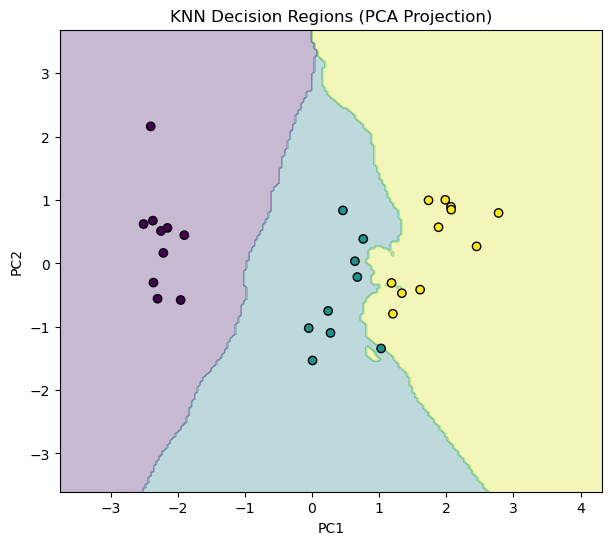

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_scaled)
X_test_2d = pca.transform(X_test_scaled)

# Fit KNN on 2D projection
knn2d = KNNClassifier(n_neighbors=5)
knn2d.fit(X_train_2d, y_train)

# Grid for decision surface
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = knn2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")
scatter = plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap="viridis", edgecolor="k")
plt.title("KNN Decision Regions (PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


# Conclusion

Using our custom **`rice2025`** package, we built a complete KNN classification pipeline:

- Loaded and explored a real dataset  
- Standardized features  
- Implemented KNN classification **from scratch**  
- Achieved strong predictive accuracy  
- Visualized performance via confusion matrix and decision boundaries  
